In [2]:
import pandas as pd
import numpy as np

In [3]:
# A1 & A2

# formula to update weight
def weight_update(q, w, x = 1):
    return w + q * x

# calculate new weight function, if x argument is not given it calculate
# new bias
def calculate_new_weight(t, y, w, alpha, x=None):
    # intermediate value that does not change inbetween samples or 
    # iterations
    q = alpha * (t - y)
    temp = []
    # if condition for update of bias
    if x == None:
        return w + q
    
    # new weight updation and storing in temp
    for i in range(len(w)):
        temp.append(weight_update(q, w[i], x[i]))
        
    return temp
        
# calculate y_in value 
def y_input(x, w, b):
    sum = 0
    # summation of xi and wi plus addition of bias to find y_in
    for i in range(len(x)):
        sum = sum + x[i] * w[i]
    return sum + b

# activation function list(defined one after the other)
def step_function(y_in):
    if y_in >= 0:
        return 1
    else:
        return 0

def bi_polar_step_function(y_in):
    if y_in > 0:
        return 1
    elif y_in == 0:
        return 0
    else:
        return -1
    
def sigmoid_function(y_in):
    return 1/(1 + np.exp(-y_in))

def relu_function(y_in):
    if y_in > 0:
        return y_in
    else:
        return 0

# call activation function
def activation_function(y_in, acti_func):
    if acti_func == 'step':
        return step_function(y_in)
    elif acti_func == 'bpstep':
        return bi_polar_step_function(y_in)
    elif acti_func == 'sigmoid':
        return sigmoid_function(y_in)
    elif acti_func == 'relu':
        return relu_function(y_in)
    else:
        pass
    
# function to find sum square error to check error between epochs
def sum_square_error(y, y_bar):
    sum = 0
    for i in range(len(y_bar)):
        sum = sum + (y[i] - y_bar[i])**2
    return sum / len(y)

# main perceptron function
def perceptron(x, z, w, b, alpha, acti_func, error=0.002):
    
    data = {}
    error_list = []
    
    k = 0
    err = 1
    
    while err > error and k <= 1000:
        y_pred = []
        
        for i in range(len(x)):
            y_in = y_input(x[i], w, b) # calculate y_in
            y = activation_function(y_in, acti_func) # modify activation whenever necessary
            y_pred.append(y) # put y values in list for sum square error
            
            # when the predicted output value is not same as output value
            if y != z[i]:
                w = calculate_new_weight(z[i], y, w, alpha, x[i])
                b = calculate_new_weight(z[i], y, b, alpha)
                
        err = sum_square_error(z, y_pred) 
        error_list.append(err)
        k = k + 1 # to count iterations or epochs
        
    data['epoch'] = k
    data['weights'] = w
    data['bias'] = b
    data['error_values'] = error_list
    return data

In [4]:
# AND gate values are represented by x and z
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 0, 0, 1]
w = [0.2, -0.75]
b = 10
a = 0.05

data = perceptron(x, z, w, b, a, acti_func='step')
print("Number of epochs: ", data['epoch'])
print("Final weights: ", data['weights'])

Number of epochs:  130
Final weights:  [0.1000000000000001, 0.05000000000000032]


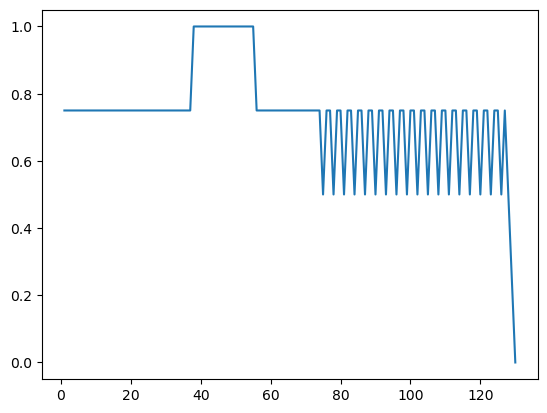

In [5]:
# plot of epochs against their respective error values
import matplotlib.pyplot as plt

plt.plot([i for i in range(1, data['epoch'] + 1)], data['error_values'])

<BarContainer object of 4 artists>

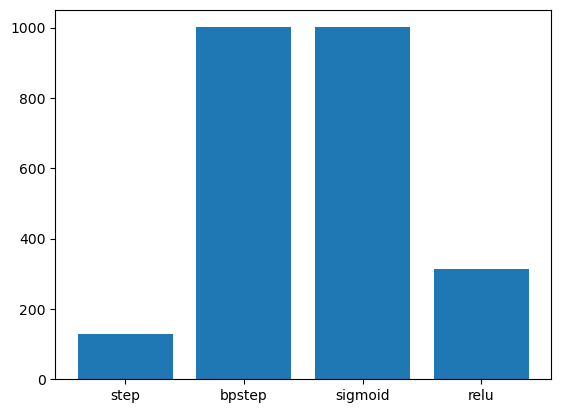

In [6]:
epoch_list = []

lst = ['step', 'bpstep', 'sigmoid', 'relu']

for i in lst:
    data = perceptron(x, z, w, b, a, acti_func=i)
    epoch_list.append(data['epoch'])

plt.bar(lst, epoch_list)

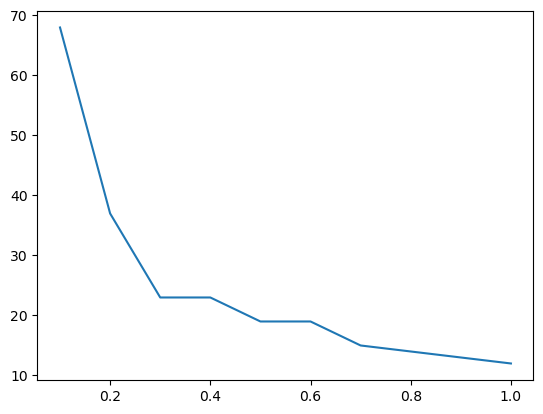

In [7]:
# A3
# number of iterations taken for learning to converge against the 
# learning rates

rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 0, 0, 1]
w = [0.2, -0.75]
b = 10

iters = []

for i in rates:
    data = perceptron(x, z, w, b, i, acti_func='step')
    iters.append(data['epoch'])

plt.plot(rates, iters)

In [8]:
# A4
# Proceed with A1 to A3 for XOR gate

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 1, 1, 0]
w = [0.2, -0.75]
b = 10
a = 0.05

data = perceptron(x, z, w, b, a, acti_func='step')
print("Number of epochs: ", data['epoch'])
print("Final weights: ", data['weights'])

Number of epochs:  1001
Final weights:  [-0.09999999999999969, -0.09999999999999969]


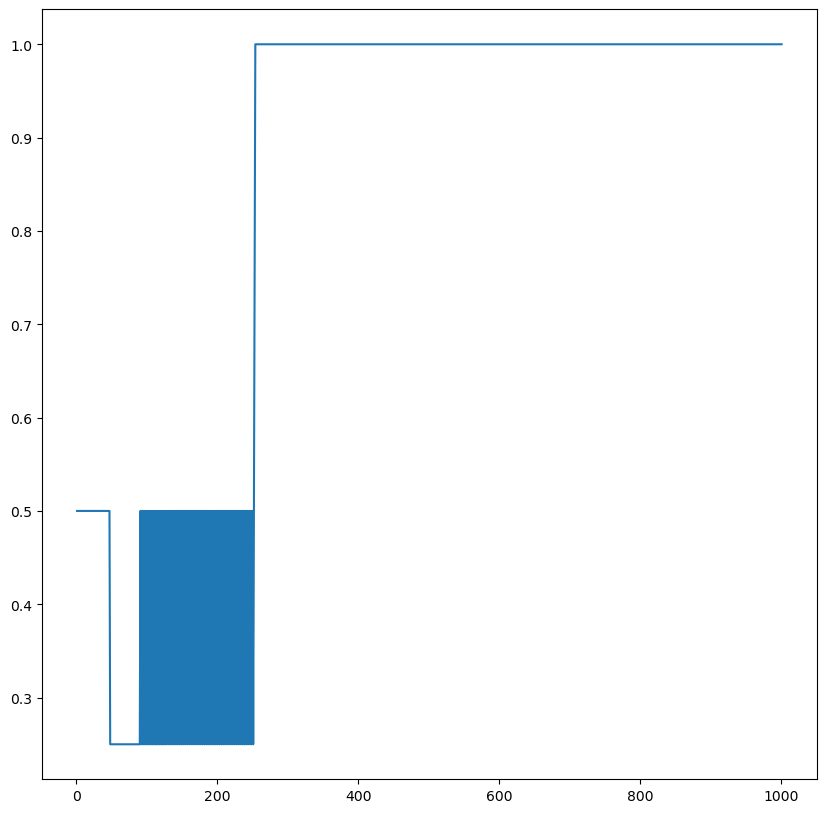

In [9]:
# plot of epochs against their respective error values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot([i for i in range(1, data['epoch'] + 1)], data['error_values'])

<BarContainer object of 4 artists>

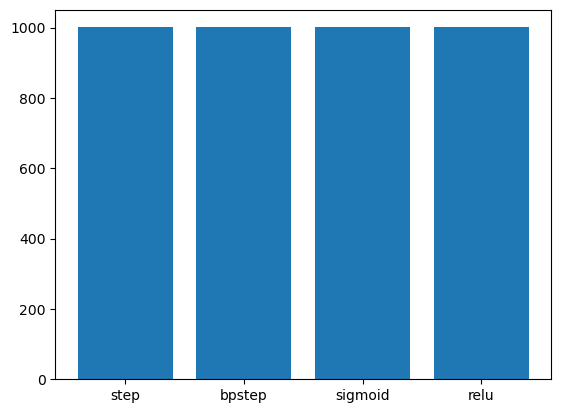

In [10]:
epoch_list = []

lst = ['step', 'bpstep', 'sigmoid', 'relu']

for i in lst:
    data = perceptron(x, z, w, b, a, acti_func=i)
    epoch_list.append(data['epoch'])

plt.bar(lst, epoch_list)

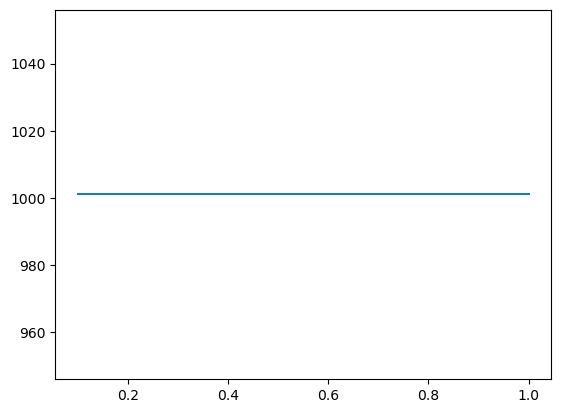

In [11]:
# number of iterations taken for learning to converge against the 
# learning rates

rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
z = [0, 1, 1, 0]
w = [0.2, -0.75]
b = 10

iters = []

for i in rates:
    data = perceptron(x, z, w, b, i, acti_func='step')
    iters.append(data['epoch'])

plt.plot(rates, iters)

In [12]:
# A5
# build perceptron to find weights which can be used to classify the 
# transaction as high or lwo value

# create required dataframe
df = pd.read_excel("mlab.xlsx")
df = df.iloc[:, :5] # removing unecessary columns
df['High Value Tx?'] = ['Yes'] * 3 + ['No', 'Yes'] * 2 + ['Yes'] + ['No'] *2

In [13]:
# modify perceptron so it can accept x as a dataframe value
def mod_perceptron(x, z, w, b, alpha, acti_func, error=0.002):
    
    data = {}
    error_list = []
    
    k = 0
    err = 1
    
    while err > error and k <= 1000:
        y_pred = []
        
        for i in range(x.shape[0]):
            y_in = y_input(x.iloc[i].tolist(), w, b) # calculate y_in
            y = activation_function(y_in, acti_func) # modify activation whenever necessary
            y_pred.append(y) # put y values in list for sum square error

            # when the predicted output value is not same as output value
            if y != z[i]:
                w = calculate_new_weight(z[i], y, w, alpha, x.iloc[i].tolist())
                b = calculate_new_weight(z[i], y, b, alpha)
        
        err = sum_square_error(z, y_pred) 
        error_list.append(err) # to count iterations or epochs
        k = k + 1
        
    data['epoch'] = k
    data['weights'] = w
    data['bias'] = b
    data['error_values'] = error_list
    return data

x = df.iloc[:, 1:4]
z = df['Payment (Rs)'].tolist()
w = [0.000002, 0.000003, -0.000001]
b = 0.000006
a = 0.95

data = mod_perceptron(x, z, w, b, a, acti_func = 'sigmoid')
print("Weights are: ", data['weights'])

Weights are:  [48036297.79970574, 9157651.349915108, 6989483.449969002]


In [14]:
# A6
# Comparing the results obtained from perceptron and matrix pseudo-inverse
matrix_A = df.iloc[:, 1:4].to_numpy()
matrix_b = df['Payment (Rs)'].to_numpy()

pinv_A = np.linalg.pinv(matrix_A)
result = pinv_A @ matrix_b

In [15]:
print("Weights from perceptron are: ", data['weights'])
print("Weights from Ax=b are: ", result)

Weights from perceptron are:  [48036297.79970574, 9157651.349915108, 6989483.449969002]
Weights from Ax=b are:  [ 1. 55. 18.]


In [16]:
# A7
# Develop given neural network with learning rate = 0.05 for AND gate

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define a neural network for one hidden layer and one output neuron
def neural_network(X, y, hidden_weights, output_weights, hidden_bias, output_bias):
    # Training loop with convergence check
    epochs = 1000
    convergence_error = 0.002

    data = {}

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        output_layer_output = sigmoid(output_layer_input)

        # Calculate the loss
        error = y - output_layer_output
        loss = 0.5 * np.mean(error ** 2)

        # Backpropagation
        output_delta = error * sigmoid_derivative(output_layer_output)
        hidden_layer_error = output_delta.dot(output_weights.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        output_weights += alpha * hidden_layer_output.T.dot(output_delta)
        output_bias += alpha * np.sum(output_delta, axis=0, keepdims=True)
        hidden_weights += alpha * X.T.dot(hidden_layer_delta)
        hidden_bias += alpha * np.sum(hidden_layer_delta, axis=0, keepdims=True)

        if loss <= convergence_error:
            print(f"Converged after {epoch + 1} epochs with loss: {loss}")
            break
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    data['epoch'] = epoch + 1
    data['hiddenweight'] = hidden_weights
    data['outputweight'] = output_weights
    data['outputbias'] = output_bias
    data['hiddenbias'] = hidden_bias   
    return data

In [17]:
# Initialize weights and biases
# For one output_neurons
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Initialize weights with random values between -1 and 1
hidden_weights = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
output_weights = 2 * np.random.rand(hidden_neurons, output_neurons) - 1

# Initialize biases with random values
hidden_bias = np.random.rand(1, hidden_neurons)
output_bias = np.random.rand(1, output_neurons)

# Learning rate
alpha = 0.05

# Training data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
neural_network(X, y, hidden_weights, output_weights, hidden_bias, output_bias)

Epoch 0, Loss: 0.18687583567204538
Epoch 100, Loss: 0.09431604797387136
Epoch 200, Loss: 0.09078526939355677
Epoch 300, Loss: 0.08846518069594128
Epoch 400, Loss: 0.08580033476996012
Epoch 500, Loss: 0.0827056032439048
Epoch 600, Loss: 0.07921692092543962
Epoch 700, Loss: 0.07541120876153272
Epoch 800, Loss: 0.07137037426727219
Epoch 900, Loss: 0.06716148262249708


{'epoch': 1000,
 'hiddenweight': array([[-1.52575591,  0.62715792],
        [-0.95806728,  1.07991881]]),
 'outputweight': array([[-1.99565307],
        [ 0.97854723]]),
 'outputbias': array([[-0.67513521]]),
 'hiddenbias': array([[ 1.07579669, -0.07428771]])}

In [18]:
# A8
# Previously defined neural network is used to experiment for XOR gate

# Initialize weights and biases
input_neurons = 2
hidden_neurons = 2
output_neurons = 1

# Initialize weights with random values between -1 and 1
hidden_weights = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
output_weights = 2 * np.random.rand(hidden_neurons, output_neurons) - 1

# Initialize biases with random values
hidden_bias = np.random.rand(1, hidden_neurons)
output_bias = np.random.rand(1, output_neurons)

# Learning rate
alpha = 0.05

# Training data for XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
neural_network(X, y, hidden_weights, output_weights, hidden_bias, output_bias)

Epoch 0, Loss: 0.12657617919653666
Epoch 100, Loss: 0.12525264607507108
Epoch 200, Loss: 0.12519812411992742
Epoch 300, Loss: 0.1251648191655789
Epoch 400, Loss: 0.12513191808360097
Epoch 500, Loss: 0.12509884104170568
Epoch 600, Loss: 0.12506537136041573
Epoch 700, Loss: 0.12503132513932533
Epoch 800, Loss: 0.12499653771633462
Epoch 900, Loss: 0.12496085576246432


{'epoch': 1000,
 'hiddenweight': array([[-0.34413706, -0.78317006],
        [ 0.48551822,  0.33915435]]),
 'outputweight': array([[ 0.06036963],
        [-0.80192872]]),
 'outputbias': array([[0.43283855]]),
 'hiddenbias': array([[0.19583078, 0.5853493 ]])}

In [19]:
# A9 
# Develop a neural network with two output nodes as given

def modified_neural_network(X, y, hidden_weights, output_weights, hidden_bias, output_bias):
    # Training loop with convergence check
    epochs = 1000
    convergence_error = np.array([0.002, 0.002])

    data = {}

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights) + hidden_bias
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
        output_layer_output = sigmoid(output_layer_input)

        # Calculate the loss
        error = y - output_layer_output
        loss = 0.5 * np.mean(error ** 2, axis = 0)

        # Backpropagation
        output_delta = error * sigmoid_derivative(output_layer_output)
        hidden_layer_error = output_delta.dot(output_weights.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

        # Update weights and biases
        output_weights += alpha * hidden_layer_output.T.dot(output_delta)
        output_bias += alpha * np.sum(output_delta, axis=0, keepdims=True)
        hidden_weights += alpha * X.T.dot(hidden_layer_delta)
        hidden_bias += alpha * np.sum(hidden_layer_delta, axis=0, keepdims=True)

        if (loss <= convergence_error).any():
            print(f"Converged after {epoch + 1} epochs with loss: {loss}")
            break
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    data['epoch'] = epoch + 1
    data['hiddenweight'] = hidden_weights
    data['outputweight'] = output_weights
    data['outputbias'] = output_bias
    data['hiddenbias'] = hidden_bias   
    return data
    

In [20]:
# Map the output values for multiple output to one output
# y = 0 ==> [o1 o2] = [1 0] ; y = 1 ==> [o1 o2] = [0 1] 
# For AND gate

# Initialize weights and biases
input_neurons = 2
hidden_neurons = 2
output_neurons = 2

# Initialize weights with random values between -1 and 1
hidden_weights = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
output_weights = 2 * np.random.rand(hidden_neurons, output_neurons) - 1

# Initialize biases with random values
hidden_bias = np.random.rand(1, hidden_neurons)
output_bias = np.random.rand(1, output_neurons)

# Learning rate
alpha = 0.05

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])
modified_neural_network(X, y, hidden_weights, output_weights, hidden_bias, output_bias)

Epoch 0, Loss: [0.12029616 0.19968087]
Epoch 100, Loss: [0.08948125 0.09460722]
Epoch 200, Loss: [0.08700573 0.09031966]
Epoch 300, Loss: [0.0850108  0.08849248]
Epoch 400, Loss: [0.08270715 0.08642261]
Epoch 500, Loss: [0.0799986  0.08388222]
Epoch 600, Loss: [0.07680838 0.08078612]
Epoch 700, Loss: [0.07306858 0.07707551]
Epoch 800, Loss: [0.06874497 0.07273053]
Epoch 900, Loss: [0.063858   0.06778513]


{'epoch': 1000,
 'hiddenweight': array([[-1.32848002,  0.37532004],
        [-1.74090034,  0.79987689]]),
 'outputweight': array([[ 2.36998275, -1.91366843],
        [-0.58053533,  0.93930979]]),
 'outputbias': array([[ 0.27701495, -0.72388203]]),
 'hiddenbias': array([[1.4032438 , 0.19917326]])}

In [21]:
# Map the output values for multiple output to one output
# y = 0 ==> [o1 o2] = [1 0] ; y = 1 ==> [o1 o2] = [0 1] 
# For XOR gate

# Initialize weights and biases
input_neurons = 2
hidden_neurons = 2
output_neurons = 2

# Initialize weights with random values between -1 and 1
hidden_weights = 2 * np.random.rand(input_neurons, hidden_neurons) - 1
output_weights = 2 * np.random.rand(hidden_neurons, output_neurons) - 1

# Initialize biases with random values
hidden_bias = np.random.rand(1, hidden_neurons)
output_bias = np.random.rand(1, output_neurons)

# Learning rate
alpha = 0.05

# 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
modified_neural_network(X, y, hidden_weights, output_weights, hidden_bias, output_bias)

Epoch 0, Loss: [0.13650718 0.13551195]
Epoch 100, Loss: [0.12678873 0.12544819]
Epoch 200, Loss: [0.12634545 0.12523053]
Epoch 300, Loss: [0.12609243 0.12517518]
Epoch 400, Loss: [0.12588991 0.1251335 ]
Epoch 500, Loss: [0.12572486 0.12510117]
Epoch 600, Loss: [0.12558913 0.12507579]
Epoch 700, Loss: [0.12547645 0.12505556]
Epoch 800, Loss: [0.12538188 0.12503913]
Epoch 900, Loss: [0.1253015  0.12502549]


{'epoch': 1000,
 'hiddenweight': array([[ 0.49281252,  0.34883082],
        [-0.75188153,  0.01238953]]),
 'outputweight': array([[-1.00768837,  0.21377481],
        [ 0.62655929,  0.27752443]]),
 'outputbias': array([[ 0.16324998, -0.25711709]]),
 'hiddenbias': array([[ 0.07437335, -0.01574553]])}

In [22]:
# A10
# MLPClassifier from scikit
from sklearn.neural_network import MLPClassifier

# AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

clf_and = MLPClassifier(random_state=1, max_iter=1000)
clf_and.fit(X, y)
print("Accuracy Score: ", clf_and.score(X, y))
print("Predict 1, 1: ", clf_and.predict(np.array([[1, 1]])))
print(clf_and.get_params(deep=True))

Accuracy Score:  1.0
Predict 1, 1:  [1]
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [23]:
# XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

clf_xor = MLPClassifier(random_state=1, max_iter=1000)
clf_xor.fit(X, y)
print("Accuracy Score: ", clf_xor.score(X, y))
print("Predict 1, 1: ", clf_xor.predict(np.array([[1, 1]])))
print(clf_xor.get_params(deep=True))

Accuracy Score:  1.0
Predict 1, 1:  [0]
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [24]:
# A11
# We will perform on the project dataset
from sklearn.model_selection import train_test_split

df1 = pd.read_csv("lab3.csv")

# Creating similar size samples of ham and spam
ham = df1[df1['Category'] == 'ham']
spam = df1[df1['Category'] == 'spam']
ham = ham.sample(spam.shape[0])

# Now combine these to form a dataset.
dataset = pd.concat([ham, spam], ignore_index=True)

x_trn, x_tst, y_trn, y_tst = train_test_split(dataset['Message'], dataset['Category'], test_size=0.3)

from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
x_trn = tfid.fit_transform(x_trn).toarray()
x_tst = tfid.transform(x_tst).toarray()
y_trn = tfid.transform(y_trn).toarray()
y_tst = tfid.transform(y_tst).toarray()

clf_project = MLPClassifier(max_iter=200)
clf_project.fit(x_trn, y_trn)
y_pred = clf_project.predict(x_tst)

/home/madhav/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# Max Iter was given value 200 since anything more would take more than 3 minutes to train
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(y_tst, y_pred))

Accuracy Score: 0.8841870824053452
